# Linear Regression Model example 

<div class = 'alert alert-box alert-success'>
This Notebook is application of
LINEAR REGRESSION using Scikit-learn library
    
<a href='https://inria.github.io/scikit-learn-mooc/python_scripts/linear_regression_in_sklearn.html'> Reference Notebook Link </a>
</div>

In [3]:
import pandas as pd

penguins = pd.read_csv('./penguins_regression.csv')
penguins.head()


,Flipper Length (mm),Body Mass (g)
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
3,193.0,3450.0
4,190.0,3650.0


In [13]:
import seaborn as sns

feature_name = 'Flipper Length (mm)'
target_name = 'Body Mass (g)'
data, target = penguins[[feature_name]],penguins[target_name]


In [21]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(data, target)

LinearRegression()

In [28]:
weight_flipper_length = linear_regression.coef_[0]
weight_flipper_length

49.68556640610011

In [29]:
intercept_body_mass = linear_regression.intercept_
intercept_body_mass

-5780.831358077066

In [31]:
# We will use the weight and intercept to
# plot the model found using the scikit-learn.

import numpy as np

flipper_length_range = np.linspace(data.min(), data.max(), num = 300)
predicted_body_mass = (
    weight_flipper_length * flipper_length_range + intercept_body_mass)

Text(0.5, 1.0, 'Model using LinearRegression from scikit-learn')

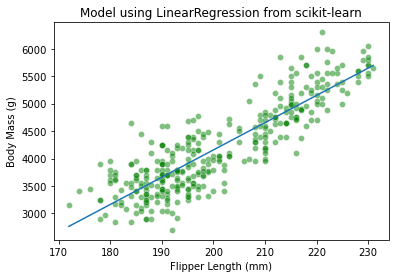

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

p = sns.scatterplot(x = data[feature_name], y = target, color="green",
                    alpha=0.5)
plt.plot(flipper_length_range, predicted_body_mass)
plt.title('Model using LinearRegression from scikit-learn')

<div class = 'alert alert-info'>
The first line using <code>sns</code> was used to plot the scatter plot of all the Flipper lengths with respect to the body Masses.
The matplotlib's <code>plt</code> was used to plot the linear regression line.
</div>

## Error Calculation

In [34]:
from sklearn.metrics import mean_squared_error

inferred_body_mass = linear_regression.predict(data)
model_error = mean_squared_error(target, inferred_body_mass)
print(f"The mean squared error of the optimal model is {model_error:.2f}")

The mean squared error of the optimal model is 154546.19


<font color = 'purple'>
A linear regression model minimizes the mean squared error on the training set. This means that the parameters obtained after the fit (i.e. <code>coef_</code> and <code>intercept_</code>) are the optimal parameters that minimizes the mean squared error. In other words, any other choice of parameters will yield a model with a higher mean squared error on the training set.
</font>    

In [35]:
from sklearn.metrics import mean_absolute_error

model_error = mean_absolute_error(target, inferred_body_mass)
print(f"The mean absolute error of the optimal model is {model_error:.2f} g")

The mean absolute error of the optimal model is 313.00 g


<font color = 'red'>
A mean absolute error of 313 means that in average, our model make an error of +/- 313 grams when predicting the body mass of a penguin given its flipper length.
</font>